# Лабораторная работа №1. 

Данная лабораторная работа состоит из нескольких блоков. В каждом блоке вам предлагается произвести некоторые манипуляции с данными и сделать некоторые выводы.
* Задавать вопросы можно и нужно.
* Списывать не нужно. Работы, которые были списаны обнуляются.
* Блоки выполняются последовательно и оцениваются отдельно.

##  Part 2. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [79]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

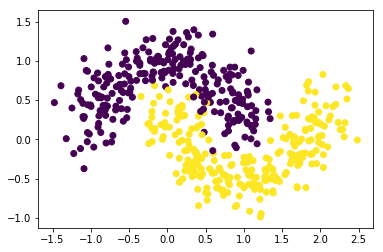

In [80]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from mlxtend.plotting import plot_decision_regions
### YOUR CODE HERE

In [82]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

lr = LogisticRegression(solver='saga', max_iter=10000, C=1.0, penalty='l1', n_jobs=-1)
svm = SVC(kernel='linear', C=1.0)

#### LogReg

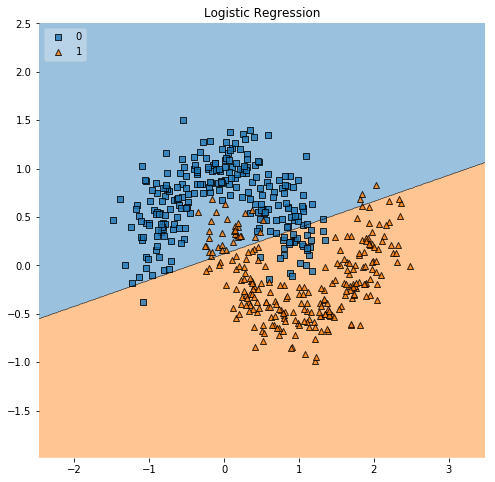

accuracy = 0.860
f1_score = 0.859


In [83]:
lr.fit(moons_points, moons_labels)

plt.figure(figsize=(8,8))
fig = plot_decision_regions(X=moons_points, y=moons_labels, clf=lr, legend=2)
plt.title('Logistic Regression')
plt.show()

print('accuracy = %.3f'%accuracy_score(moons_labels, lr.predict(moons_points)))
print('f1_score = %.3f'%f1_score(moons_labels, lr.predict(moons_points)))

#### SVM

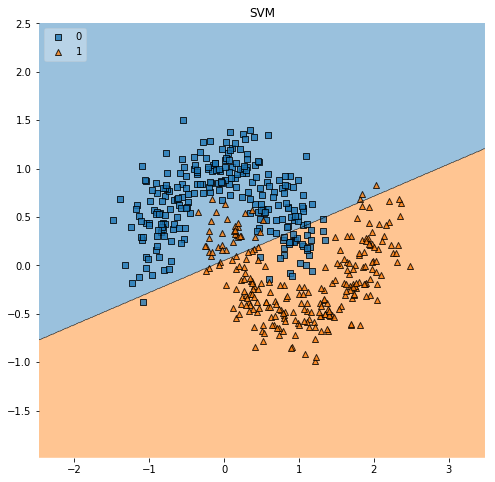

accuracy = 0.858
f1_score = 0.857


In [84]:
svm.fit(moons_points, moons_labels)

plt.figure(figsize=(8,8))
fig = plot_decision_regions(X=moons_points, y=moons_labels, clf=svm, legend=2)
plt.title('SVM')
plt.show()

print('accuracy = %.3f'%accuracy_score(moons_labels, svm.predict(moons_points)))
print('f1_score = %.3f'%f1_score(moons_labels, svm.predict(moons_points)))

## 1.2 Kernel tirck

![keep-calm](imgs/keep-calm.jpg)

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

In [92]:
### YOUR CODE HERE
from sklearn.model_selection import GridSearchCV
svc_0 = SVC()

#### Poly kernel type

In [100]:
pg = {'C' : [1.0], 'kernel' : ['poly'], 'degree' : np.arange(0,10)}

grid_search = GridSearchCV(estimator=svc_0, param_grid=pg, cv=5, n_jobs=-1)
grid_search.fit(moons_points, moons_labels)

best_params = grid_search.best_params_
best_params

C:\Users\Дмитрий В\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


{'C': 1.0, 'degree': 1, 'kernel': 'poly'}

In [101]:
svc = SVC(C=1.0, degree=best_params['degree'], kernel='poly')
svc.fit(moons_points, moons_labels)

C:\Users\Дмитрий В\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

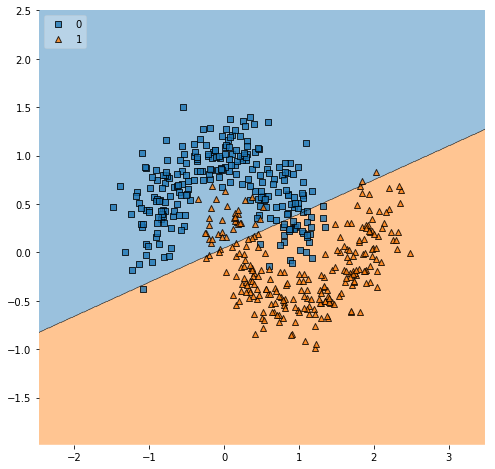

accuracy score = 0.854
f1_score = 0.853


In [102]:
plt.figure(figsize=(8,8))
fig = plot_decision_regions(X=moons_points, y=moons_labels, clf=svc, legend=2)
plt.show()

print('accuracy score = %.3f'%accuracy_score(moons_labels, svc.predict(moons_points)))
print('f1_score = %.3f'%f1_score(moons_labels, svc.predict(moons_points)))

#### RBF kernel type

In [109]:
pg = {'C' : [1.0], 'kernel' : ['rbf'], 'degree' : np.arange(0,10)}

grid_search = GridSearchCV(estimator=svc_0, param_grid=pg, n_jobs=-1)
grid_search.fit(moons_points, moons_labels)

best_params = grid_search.best_params_
best_params

C:\Users\Дмитрий В\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Дмитрий В\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


{'C': 1.0, 'degree': 0, 'kernel': 'rbf'}

In [110]:
svc = SVC(C=1.0, degree=best_params['degree'], kernel='rbf')
svc.fit(moons_points, moons_labels)

C:\Users\Дмитрий В\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=0, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

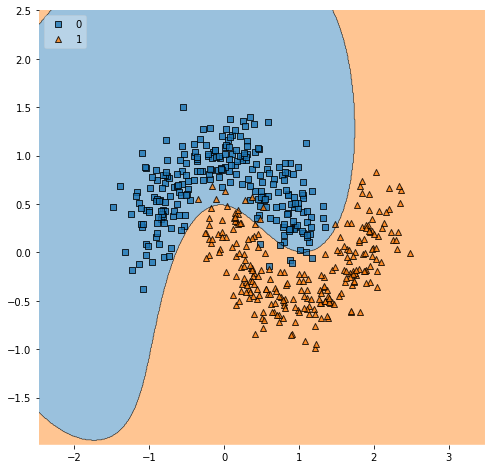

accuracy score = 0.968
f1_score = 0.968


In [111]:
plt.figure(figsize=(8,8))
fig = plot_decision_regions(X=moons_points, y=moons_labels, clf=svc, legend=2)
plt.show()

print('accuracy score = %.3f'%accuracy_score(moons_labels, svc.predict(moons_points)))
print('f1_score = %.3f'%(f1_score(moons_labels, svc.predict(moons_points))))

#### Sigmoid kernel type

In [112]:
pg = {'C' : [1.0], 'kernel' : ['sigmoid'], 'degree' : np.arange(0,10)}

grid_search = GridSearchCV(estimator=svc_0, param_grid=pg, n_jobs=-1)
grid_search.fit(moons_points, moons_labels)

best_params = grid_search.best_params_
best_params

C:\Users\Дмитрий В\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Дмитрий В\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Дмитрий В\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


{'C': 1.0, 'degree': 0, 'kernel': 'sigmoid'}

In [113]:
svc = SVC(C=1.0, degree=best_params['degree'], kernel='sigmoid')
svc.fit(moons_points, moons_labels)

C:\Users\Дмитрий В\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=0, gamma='auto_deprecated',
    kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

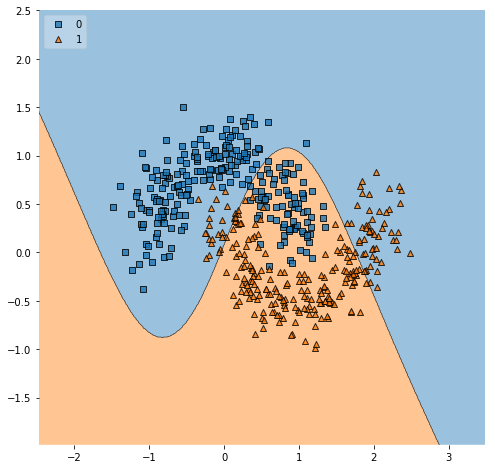

accuracy score = 0.680
f1_score = 0.685


In [114]:
plt.figure(figsize=(8,8))
fig = plot_decision_regions(X=moons_points, y=moons_labels, clf=svc, legend=2)
plt.show()

print('accuracy score = %.3f'%accuracy_score(moons_labels, svc.predict(moons_points)))
print('f1_score = %.3f'%f1_score(moons_labels, svc.predict(moons_points)))

Судя по результатам, полученным из GreadSearch, оптимальными значениями degree являются 0 и 1. На этом фоне получили,
что лучшее качество классификации получается при использовании rbf kernel, в то время как при использовании poly и sigmoid
оно значительно хуже

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

In [115]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
### YOUR CODE HERE

In [116]:
pf = PolynomialFeatures(degree=3) #полином 3 степени
lr = LogisticRegression(C=1.0, solver='saga', max_iter=10000, penalty='l1', n_jobs=-1)

pip = Pipeline([('pf', pf), ('lr', lr)])
pip.fit(moons_points, moons_labels)

Pipeline(memory=None,
         steps=[('pf',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=10000,
                                    multi_class='warn', n_jobs=-1, penalty='l1',
                                    random_state=None, solver='saga',
                                    tol=0.0001, verbose=0, warm_start=False))],
         verbose=False)

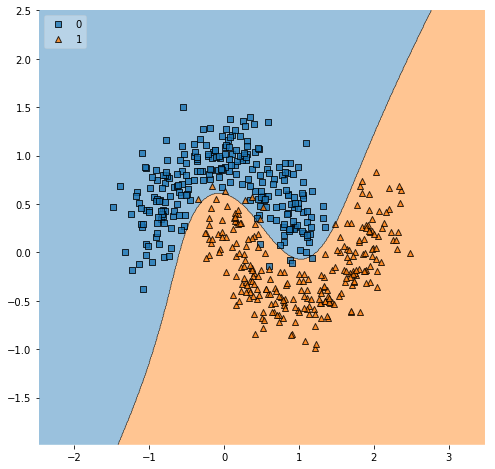

accuracy score = 0.680
f1_score = 0.974


In [117]:
plt.figure(figsize=(8,8))
fig = plot_decision_regions(X=moons_points, y=moons_labels, clf=pip, legend=2)
plt.show()

print('accuracy score = %.3f'%accuracy_score(moons_labels, svc.predict(moons_points)))
print('f1_score = %.3f'%f1_score(moons_labels, pip.predict(moons_points)))

Результат похож на SVM с rbf kernel.

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

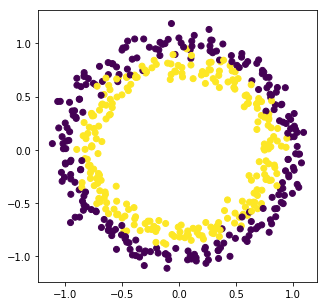

In [70]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

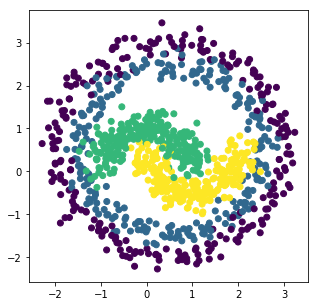

In [71]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

In [136]:
### YOUR CODE HERE
svc = SVC(C=1.0, degree = 2, kernel='rbf')
svc.fit(points, labels)

C:\Users\Дмитрий В\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

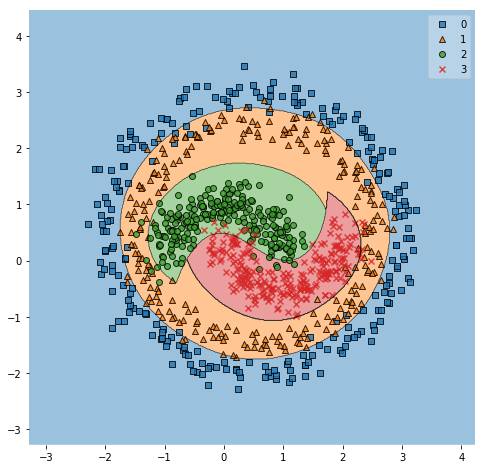

accuracy score = 0.934
f1_score = 0.934


In [137]:
plt.figure(figsize=(8,8))
fig = plot_decision_regions(X=points, y=labels, clf=svc, legend=1)
plt.show()

print('accuracy score = %.3f'%accuracy_score(labels, svc.predict(points)))
print('f1_score = %.3f'%f1_score(labels, svc.predict(points), average='weighted'))

In [138]:
lr = LogisticRegression(C=1.0, solver='saga', penalty='l1', n_jobs=-1)
pf = PolynomialFeatures(degree=2)

pip = Pipeline([('pf', pf), ('lr', lr)])
pip.fit(points, labels)

C:\Users\Дмитрий В\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Дмитрий В\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('pf',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=-1, penalty='l1',
                                    random_state=None, solver='saga',
                                    tol=0.0001, verbose=0, warm_start=False))],
         verbose=False)

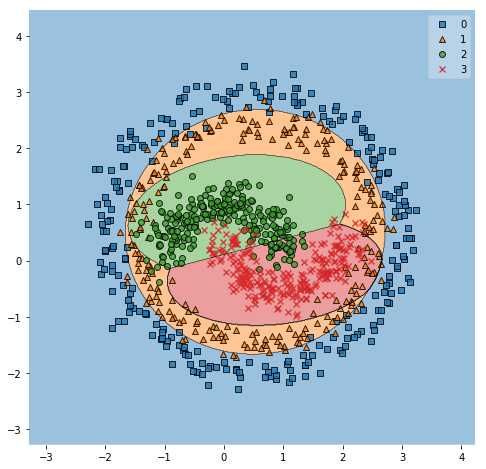

accuracy score = 0.837
f1_score = 0.835


In [139]:
plt.figure(figsize=(8,8))
fig = plot_decision_regions(X=points, y=labels, clf=pip, legend=1)
plt.show()

print('accuracy score = %.3f'%accuracy_score(labels, pip.predict(points)))
print('f1_score = %.3f'%f1_score(labels, pip.predict(points), average='weighted'))

SVM с rbf kernel оказадся точнее Poly Features